In [1]:
# Let us import the main code function with all of it's libraries
exec(open("Function.py").read())
%matplotlib inline

# Performing EDA on Play-by-play Data

After performing scraping and exporting all of the data into a `.csv` file we can import the data back into this notebook to perform some analysis on the data. Here we are going to explain what the features are, and understand what feautures are important and how spearable the data really is.

In [2]:
# Let's import the data after appropriate parsing of the files
EDA=EDAImport('Data/AllFeatures.csv')

Here are the different information we have about the processed data. We can look at the relationship of each of these features with respect to the other features.

In [3]:
EDA.PrintKeys()

['Unnamed: 0' 'time' 'awayteam' 'hometeam' 'event' 'isawayevent'
 'isawaypossess' 'awayscore' 'homescore' 'quarter_real' 'Defensive rebound'
 'Offensive rebound' 'makes free throw' 'makes technical free throw'
 'makes 2-pt shot' 'makes 3-pt shot' 'misses free throw'
 'misses technical free throw' 'misses 2-pt shot' 'misses 3-pt shot'
 'Personal foul' 'Personal take foul' 'Loose ball foul' 'Shooting foul'
 'Technical foul' 'Turnover' 'full timeout' 'assist by'
 'count away Defensive rebound' 'count away Offensive rebound'
 'count away makes free throw' 'count away makes technical free throw'
 'count away makes 2-pt shot' 'count away makes 3-pt shot'
 'count away misses free throw' 'count away misses technical free throw'
 'count away misses 2-pt shot' 'count away misses 3-pt shot'
 'count away Personal foul' 'count away Personal take foul'
 'count away Loose ball foul' 'count away Shooting foul'
 'count away Technical foul' 'count away Turnover'
 'count away full timeout' 'count away as

For all of the analysis, we are observing points colored **red** if the home team wins, and **blue** of the away team wins. Because the dataset is very large given the number of games and timed games, we randomly sample the dataset using pandas' sample command. We pass our desired sample rate onto the EDA function to output our desired number of sample points.

## Team stats
To predict the result of a game, we need to consider two major types of factors, the **outside-game** factors and the **inside-game** factors. Generally outside-game factors include how strong the team is comparing to its opponent and does the team have home advantage, etc. The inside-game factors show the condition of the team tonight, how many rebounds grabbed, what’s the shooting rate and what’s the turnover number of tonight’s game. Also, what is situation the team in: is the team trailing or leading, by how much, and how much time left. These are all the possible factors that influence the outcome of a game. 

### outside-game factors
We assume that the power of a team remains almost constant during the season. The strength of a team can be evaluated based on the game played up to this point. There are numerous advanced statistical ways to evaluate a team’s performance. The following table gives you a overall idea of these team stats. 
https://stats.nba.com/teams/advanced/?sort=W&dir=-1

![title](Data/team_data.png)

The data gives us wining rate, offensive rating, defensive rating, pace, assist ratio, assist over turnover ratio, etc. These are all good indicators of the characteristics of a team. Some teams are good at high pace games, and some are good at low pace games; some are good at defense, some tend to offense. These features are very important when we are trying to predict which team’ll win. 

#### 1. Offensive rating difference versus defensive rating difference
Higher the offensive rating, better the offense, lower the defensive rating, better the defense. The points on bottom right means the home team have better offense and defense against away team, therefore, tends to win.

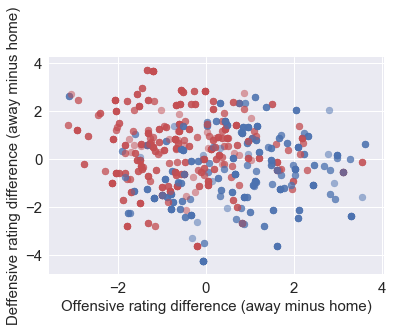

In [5]:
EDA.EDA_XYDiff('OFFRTG_y','OFFRTG_x','DEFRTG_y','DEFRTG_x',1000,
               'Offensive rating difference (away minus home)',
               'Deffensive rating difference (away minus home)')

#### 2. Shooting accuracy
We have effective field goal rate (EFG%) and true shooting rate (TS%) to measure how good a team is in shooting. In this part we should see how the difference in shooting accuracy effects winning or not. From the plot we know that two criteria are highly correlated, and if the away team (in previous games) shoots better than home team, then it'll have a better chance to win (more blue dots on the top right conor, more red dots on the bottom left )

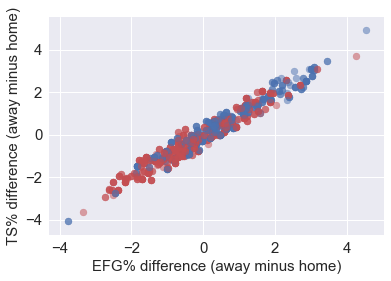

In [9]:
EDA.EDA_XYDiff('EFG%_y','EFG%_x','TS%_y','TS%_x',1000,
               'EFG% difference (away minus home)',
               'TS% difference (away minus home)')

#### 3. Control the turnover and share the ball
We plot here Assist ratio (%) difference versus Assist/Turnovers difference. These two factors seems to have less impact on the outcomes of games.

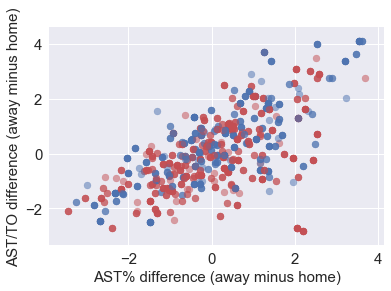

In [7]:
EDA.EDA_XYDiff('AST%_y','AST%_x','AST/TO_y','AST/TO_x',1000,
               'AST% difference (away minus home)',
               'AST/TO difference (away minus home)')

### inside-game factors
A weaker team can beat a stronger team in some cases. Here we take advantages of play by
play data to adjust the prediction through the procession of the game. We extract **time
remaining** and **leading points**. From event strings, we can extract defensive rebounds,
offensive rebounds, assist numbers, shooting rates, etc for both teams. These factors show the
**condition** of both teams tonight. A bad team can be in very good condition and therefore beat the better team. Furthermore, we extract which team **possess** the ball according to the event strings.

#### 1. Leading points versus time remaining
When there is enough time remaining, leading team has more chance to lose and trailing team has more chance to win, therefore points are mixed, as the game goes they are more and more separated. This enlight us with an idea of **adjusted leading**, which is the points lead divided by the time remaining. We will use this as a new feature in training and prediction.

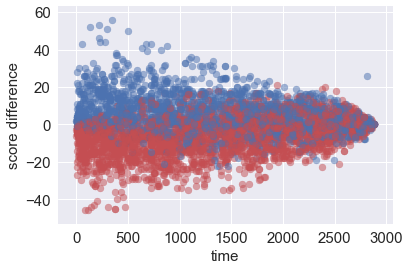

In [4]:
EDA.EDA_YDiff('time','homescore','awayscore',5000,'score difference')

#### 2. Difference in defensive rebound versus difference in offensive rebounds
Generally it is believed that the team that controls the rebound controls the game. From the rebounds difference we noticed that the team grab more defensive rebounds tends to win the game. So rebound difference at certain point of the game is a good indication of two teams' condition, and therefore influences the win probabilties.

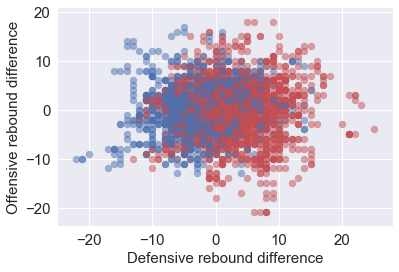

In [5]:
EDA.EDA_XYDiff('count away Defensive rebound','count home Defensive rebound','count away Offensive rebound','count home Offensive rebound',5000,'Defensive rebound difference','Offensive rebound difference')

#### 3. Is the team in trouble: Away timeout used and home timeout used

The more timeout used that means the worse the team’s situation is, and therefore higher chance to lose.

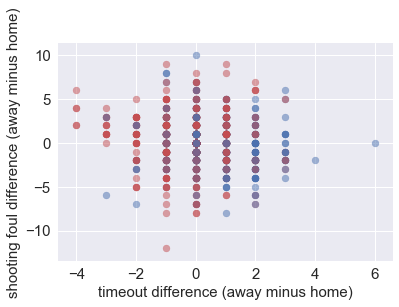

In [6]:
EDA.EDA_XYDiff('count away full timeout','count home full timeout','count away Shooting foul',
               'count home Shooting foul',1000,'timeout difference (away minus home)'
               ,'shooting foul difference (away minus home)')

So in the end, we merge two types of factors into a big dataset, where each row of the dataset
contains inside-game factors as well as outside game factors for both team. Also, we give the
outcome of the game by isawaywin. Then we train on this dataset to predict the outcome and
WP of a game at each event point. 

This particualr data frame is saved as *Data/AllFeatures.csv*.